# Imports

## Import des librairies

In [498]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Import des données

In [499]:
data = pd.read_csv("data/train_data.csv")

In [500]:
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


# Cleaning 

step-by-step : 

- basics info (.info, .describe)
- duplicates
- unique values
- missing values
- knows the datatypes
- outliers

## Basics informations

In [501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


I can remake the columns index : 

In [502]:
data =data.rename(columns = {'Unnamed: 0': 'index'})

In [503]:
data.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Duplicate values

In [504]:
data.duplicated().sum()

0

## Unique values in the data 

I have only 1 qualitative variable ("ocean_proximity"), it can be better for further analysis to transform these values by binaries values

In [505]:
data["ocean_proximity"].unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

I can do it with get dummies

In [506]:
data_binaries = pd.get_dummies(data, columns=['ocean_proximity'], prefix=[""])

In [507]:
data_binaries

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0


## missing values

In [508]:
data_binaries.isnull().sum()

index                   0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
_<1H OCEAN              0
_INLAND                 0
_ISLAND                 0
_NEAR BAY               0
_NEAR OCEAN             0
dtype: int64

In [509]:
data_loc_nan = data_binaries.loc[data_binaries["total_bedrooms"].isnull()]

In [510]:
data_loc_nan

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
33,5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,1,0,0,0,0
171,2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,0,0,0,0,1
178,10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,0,1,0,0,0
179,19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,0,1,0,0,0
259,19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,0,0,0,0,1
16089,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,0,0,0,0,1
16214,4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,1,0,0,0,0
16228,9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,0,0,0,1,0


In [511]:
data_loc_nan[["longitude", "latitude"]].describe()

,longitude,latitude
count,176.000000,176.000000
mean,-119.495909,35.514716
std,1.985183,2.063548
min,-124.130000,32.660000
25%,-121.857500,34.010000
50%,-118.495000,34.200000
75%,-118.050000,37.450000
max,-114.590000,40.920000


with the mean and the std of "longitude" and "latitude" we can see that the NaN are in the same localisation 

I will just drop them, they represent a low percentage of my data 

In [512]:
data_no_nan = data_binaries.dropna()

In [513]:
data_no_nan.isnull().sum()

index                 0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
_<1H OCEAN            0
_INLAND               0
_ISLAND               0
_NEAR BAY             0
_NEAR OCEAN           0
dtype: int64

## the datatypes of my data

In [514]:
data_no_nan.dtypes

index                   int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
_<1H OCEAN              uint8
_INLAND                 uint8
_ISLAND                 uint8
_NEAR BAY               uint8
_NEAR OCEAN             uint8
dtype: object

I change the type of all my 'uint8' to 'int64'

In [515]:
data_good_type = data_no_nan.astype({"_<1H OCEAN": int, "_INLAND": int, "_ISLAND": int, "_NEAR BAY": int,
                                    "_NEAR OCEAN": int})

In [516]:
data_good_type.dtypes

index                   int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
_<1H OCEAN              int64
_INLAND                 int64
_ISLAND                 int64
_NEAR BAY               int64
_NEAR OCEAN             int64
dtype: object

## Outliers

In [517]:
data_good_type

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0


<AxesSubplot:xlabel='housing_median_age'>

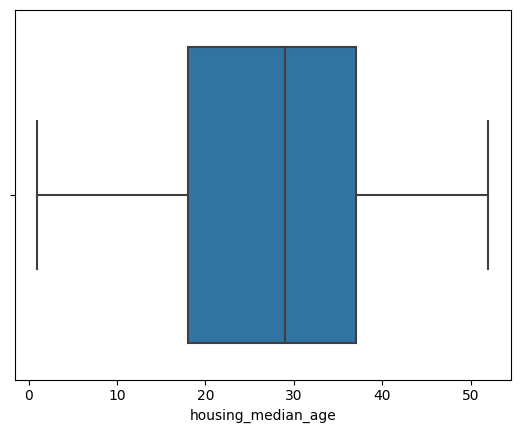

In [518]:
sns.boxplot(x= data_good_type["housing_median_age"])

<AxesSubplot:xlabel='total_rooms'>

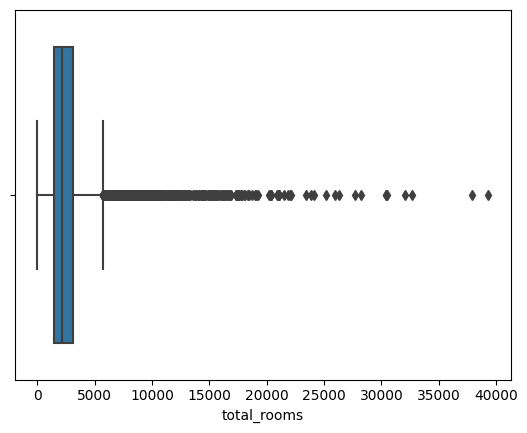

In [519]:
sns.boxplot(x = data_good_type["total_rooms"])

<AxesSubplot:xlabel='total_bedrooms'>

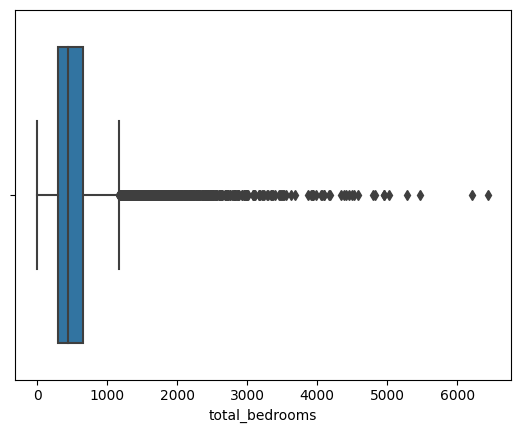

In [520]:
sns.boxplot(x = data_good_type["total_bedrooms"])

<AxesSubplot:xlabel='population'>

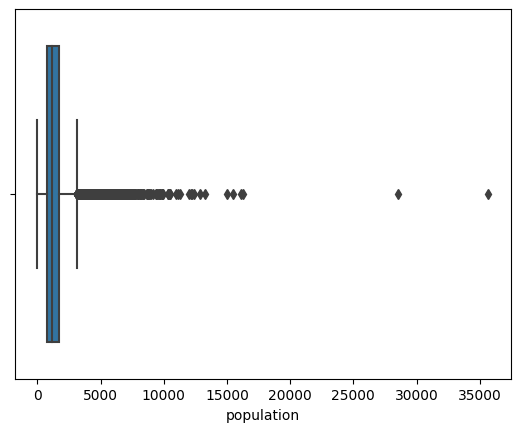

In [521]:
sns.boxplot(x = data_good_type["population"])

<AxesSubplot:xlabel='households'>

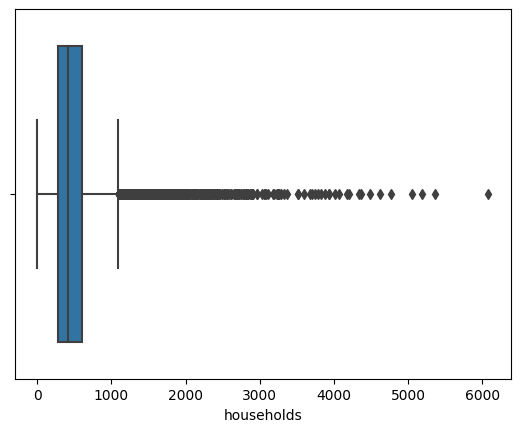

In [522]:
sns.boxplot(x = data_good_type["households"])

<AxesSubplot:xlabel='median_income'>

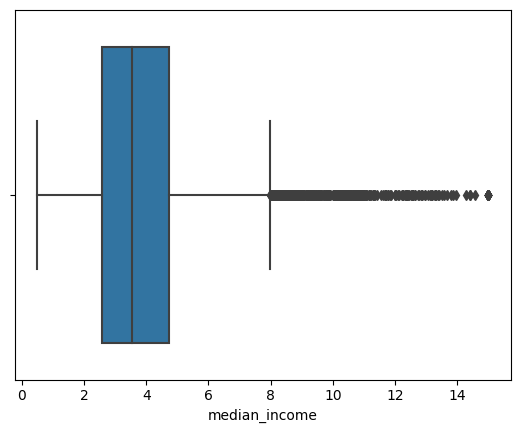

In [523]:
sns.boxplot(x = data_good_type["median_income"])

<AxesSubplot:xlabel='median_house_value'>

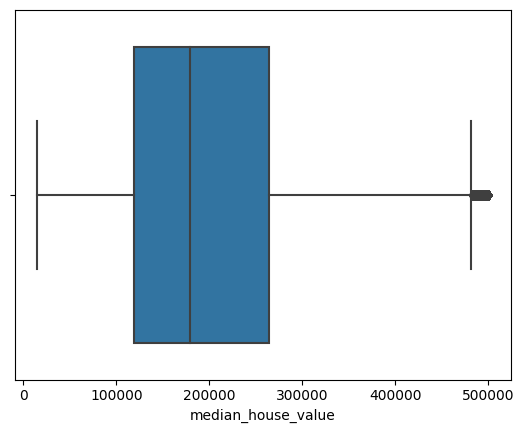

In [524]:
sns.boxplot(x = data_good_type["median_house_value"])

My outliers can skew the prediction of my model, but what can I do with them :

1) Imputing with median/mean.
- f we were talking about 3 or 4 values then this can be a compromise, not so with so many values as this will be misinforming the machine learning algorithm.

2) Dropping the records with outlying values.
- Sometimes outliers do occur dues to measurement or recording errors and dropping such can work, not so with our data seeing that its most likely not as a result of error. Hence, dropping them doesn’t sound well for this case, also, I think this will lead to loss of information which might be important in the learnings of the machine.

3)Normalization..

- y understanding of normalization is that it scales values into a range say 0–1, what that essentially means is that the extreme values will still lie in the extremes of 0.9 whereas the other values doing the 0.000’s. And this doesn’t really address the outlier problem !


And this is what brings us to the concept of winsorization.
According to wikipedia, the term is defined as the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers, in other words we replace extreme values with less extreme values.

In [525]:
from scipy.stats.mstats import winsorize

Je vais le faire colonne par colonne pour m'adapter aux grandeurs de chaque colonne

1) Je transforme mes colonnes en arrays

In [526]:
arr_housing_median_age = data_good_type["housing_median_age"].to_numpy()
arr_total_rooms = data_good_type["total_rooms"].to_numpy()
arr_total_bedrooms = data_good_type["total_bedrooms"].to_numpy()
arr_population = data_good_type["population"].to_numpy()
arr_households = data_good_type["households"].to_numpy()
arr_median_income = data_good_type["median_income"].to_numpy()
arr_median_house_value = data_good_type["median_house_value"].to_numpy()

2) J'applique le .winzorize à mes données 

In [527]:
arr_no_out_hma = winsorize(arr_housing_median_age, (0., 0.05))
arr_no_out_tr = winsorize(arr_total_rooms, (0., 0.05))
arr_no_out_tb = winsorize(arr_total_bedrooms, (0., 0.05))
arr_no_out_p = winsorize(arr_population, (0., 0.05))
arr_no_out_h = winsorize(arr_households, (0., 0.05))
arr_no_out_mi = winsorize(arr_median_income, (0., 0.05))
arr_no_out_mhv = winsorize(arr_median_house_value, (0., 0.05))

je rentransforme mes arrays en dataframe

In [528]:
df_no_out_hma = pd.DataFrame(arr_no_out_hma, columns = ["housing_median_age"])
df_no_out_tr = pd.DataFrame(arr_no_out_tr, columns = ["total_rooms"])
df_no_out_tb = pd.DataFrame(arr_no_out_tb, columns = ["total_bedrooms"])
df_no_out_p = pd.DataFrame(arr_no_out_p, columns = ["population"])
df_no_out_h = pd.DataFrame(arr_no_out_h, columns = ["households"])
df_no_out_mi = pd.DataFrame(arr_no_out_mi, columns = ["median_income"])
df_no_out_mhv = pd.DataFrame(arr_no_out_mhv, columns = ["median_house_value"])

Je join mes dataframes en un seul

In [529]:
df_gd_1 = data_good_type[["index", "longitude", "latitude", "_<1H OCEAN", "_INLAND", "_ISLAND", "_NEAR BAY", "_NEAR OCEAN"]]
df_no_out_0 = pd.concat([df_gd_1, df_no_out_hma], axis = 1)
df_no_out_1 = pd.concat([df_no_out_0, df_no_out_tr], axis = 1)
df_no_out_2 = pd.concat([df_no_out_1, df_no_out_tb], axis = 1)
df_no_out_3 = pd.concat([df_no_out_2, df_no_out_p], axis = 1)
df_no_out_4 = pd.concat([df_no_out_3, df_no_out_h], axis = 1)
df_no_out_5 = pd.concat([df_no_out_4, df_no_out_mi], axis = 1)
df_no_out = pd.concat([df_no_out_5, df_no_out_mhv], axis = 1)

In [530]:
df_no_out = df_no_out.dropna()
df_no_out = df_no_out.astype({"index": object, "_<1H OCEAN": int, "_INLAND": int, "_ISLAND": int, "_NEAR BAY": int,
                              "_NEAR OCEAN": int})

In [531]:
df_no_out.dtypes

index                  object
longitude             float64
latitude              float64
_<1H OCEAN              int64
_INLAND                 int64
_ISLAND                 int64
_NEAR BAY               int64
_NEAR OCEAN             int64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

Je regarde les stats de mon dataframe

In [532]:
data_good_type.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
count,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000
mean,10292.025343,-119.564780,35.627727,28.622551,2644.361349,539.319540,1434.176787,500.926604,3.863597,206442.492287,0.441969,0.317703,0.000245,0.110492,0.129591
std,5939.817307,2.005294,2.139979,12.607315,2217.697233,425.207704,1158.712057,385.466770,1.892362,115264.335238,0.496636,0.465598,0.015647,0.313512,0.335863
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5180.750000,-121.790000,33.930000,18.000000,1447.000000,296.000000,788.000000,280.000000,2.562500,119375.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10265.500000,-118.490000,34.250000,29.000000,2115.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15431.250000,-118.010000,37.720000,37.000000,3149.250000,647.000000,1733.000000,606.000000,4.733050,264325.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [533]:
df_no_out.describe()

,longitude,latitude,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000,16160.000000
mean,-119.566478,35.630071,0.441151,0.318502,0.000186,0.110396,0.129765,28.611015,2476.394802,509.289171,1352.346720,473.597092,3.764902,205728.489913
std,2.004760,2.139250,0.496540,0.465910,0.013624,0.313392,0.336055,12.606590,1484.735824,302.766285,794.280388,275.610996,1.584823,113554.028087
min,-124.350000,32.540000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1448.000000,296.000000,788.000000,280.000000,2.559975,119300.000000
50%,-118.490000,34.250000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,2115.000000,435.000000,1168.000000,409.000000,3.531750,179200.000000
75%,-118.010000,37.710000,1.000000,1.000000,0.000000,0.000000,0.000000,37.000000,3149.000000,647.000000,1734.250000,606.000000,4.733400,264400.000000
max,-114.310000,41.950000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,6300.000000,1283.000000,3319.000000,1166.000000,7.277900,485400.000000


j'observe une nouvelle fois la dispersion de mes données:

<AxesSubplot:xlabel='latitude'>

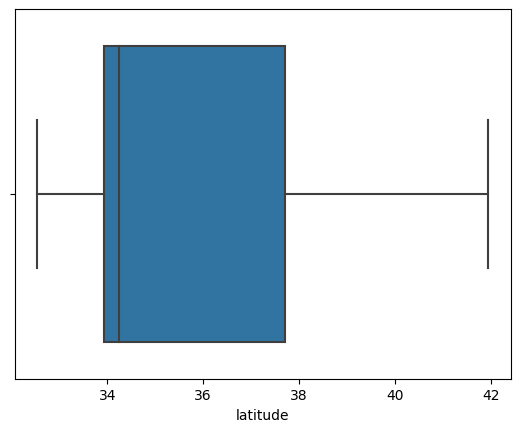

In [534]:
sns.boxplot(x= df_no_out["latitude"])

<AxesSubplot:xlabel='longitude'>

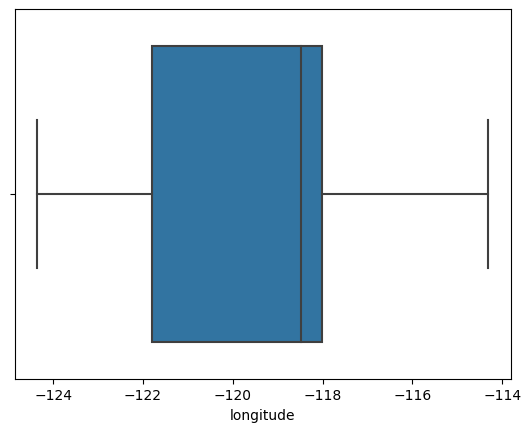

In [535]:
sns.boxplot(x= df_no_out["longitude"])

<AxesSubplot:xlabel='housing_median_age'>

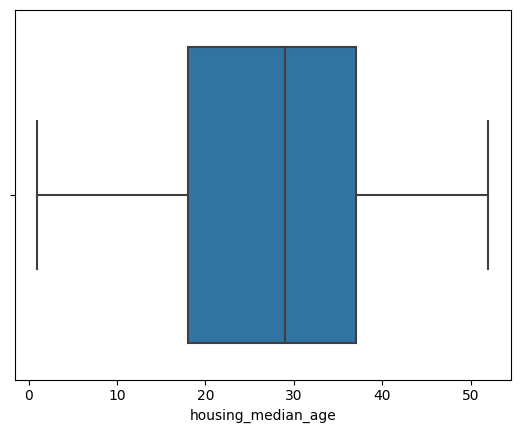

In [536]:
sns.boxplot(x= df_no_out["housing_median_age"])

<AxesSubplot:xlabel='total_rooms'>

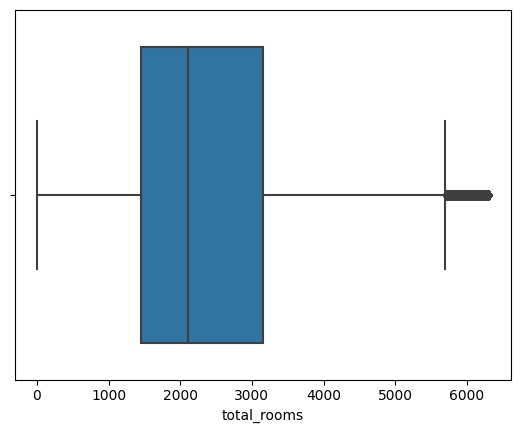

In [537]:
sns.boxplot(x = df_no_out["total_rooms"])

<AxesSubplot:xlabel='total_bedrooms'>

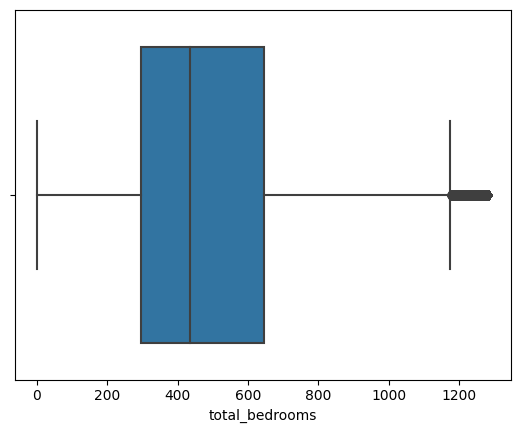

In [538]:
sns.boxplot(x = df_no_out["total_bedrooms"])

<AxesSubplot:xlabel='population'>

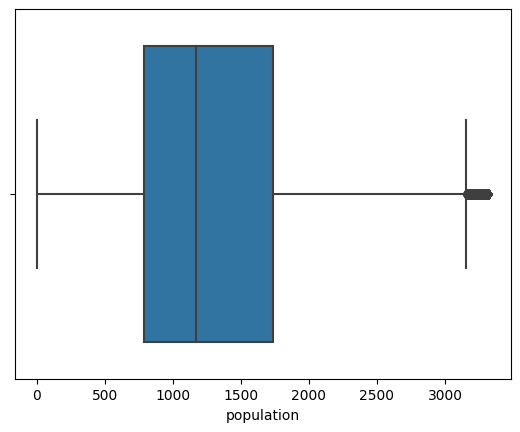

In [539]:
sns.boxplot(x = df_no_out["population"])

<AxesSubplot:xlabel='households'>

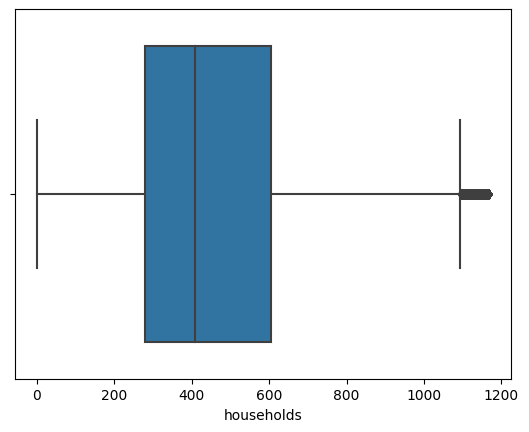

In [540]:
sns.boxplot(x = df_no_out["households"])

<AxesSubplot:xlabel='median_income'>

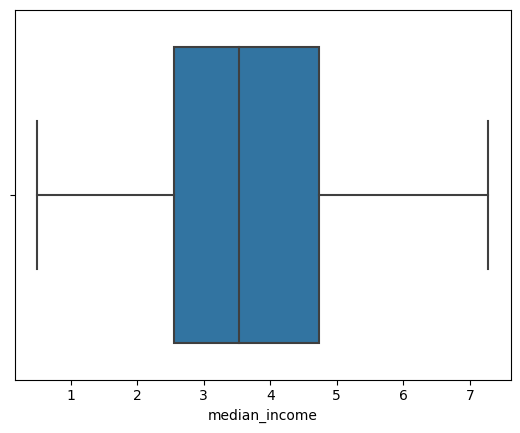

In [541]:
sns.boxplot(x = df_no_out["median_income"])

<AxesSubplot:xlabel='median_house_value'>

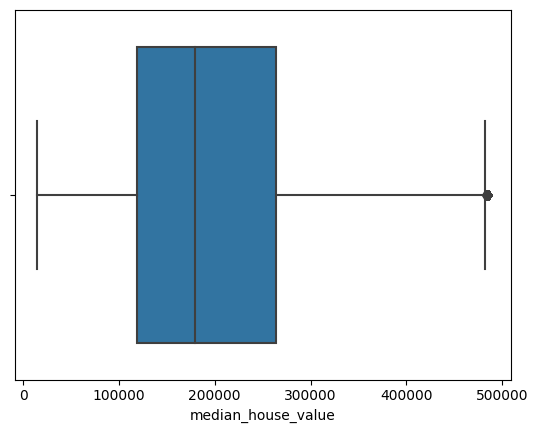

In [542]:
sns.boxplot(x = df_no_out["median_house_value"])

# Normalization 

In [543]:
from sklearn.preprocessing import MinMaxScaler

In [544]:
arr_norm = MinMaxScaler().fit_transform(df_no_out)

In [545]:
df_no_out.columns

Index(['index', 'longitude', 'latitude', '_<1H OCEAN', '_INLAND', '_ISLAND',
       '_NEAR BAY', '_NEAR OCEAN', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [546]:
df_norm = pd.DataFrame(arr_norm,
                       columns=[
                           "index","longitude", "latitude","_<1H OCEAN", "_INLAND", "_ISLAND", "_NEAR BAY", "_NEAR OCEAN",
                           "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income",
                           "median_house_value"
                       ])

In [547]:
df_norm

,index,longitude,latitude,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.100392,0.449203,0.449522,0.0,1.0,0.0,0.0,0.0,0.098039,0.293454,0.367681,0.420386,0.356529,0.144851,0.121175
1,0.513591,0.652390,0.121148,1.0,0.0,0.0,0.0,0.0,0.137255,0.321894,0.270882,0.259047,0.290378,0.946208,0.550809
2,0.120839,0.414343,0.431456,0.0,1.0,0.0,0.0,0.0,0.470588,0.138068,0.165496,0.279855,0.182131,0.155459,0.092051
3,0.207568,0.600598,0.165781,1.0,0.0,0.0,0.0,0.0,0.588235,0.097871,0.177205,0.179131,0.193299,0.151741,0.393284
4,0.801444,0.310757,0.557917,0.0,1.0,0.0,0.0,0.0,0.392157,0.304417,0.289617,0.339867,0.317869,0.528415,0.218752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,0.673240,0.799801,0.170032,0.0,1.0,0.0,0.0,0.0,0.372549,0.231808,0.215457,0.223764,0.213058,0.378076,0.167519
16156,0.960027,0.507968,0.427205,0.0,1.0,0.0,0.0,0.0,0.941176,0.374801,0.391881,0.340169,0.391753,0.311803,0.187289
16157,0.828965,0.213147,0.522848,0.0,0.0,0.0,0.0,1.0,0.352941,0.401176,0.358314,0.362786,0.366838,0.589540,0.377552
16158,0.875188,0.233068,0.501594,1.0,0.0,0.0,0.0,0.0,0.745098,0.440102,0.654176,0.766888,0.662371,0.306152,0.294432


# Standardization

In [548]:
from sklearn.preprocessing import StandardScaler

In [549]:
arr_standard = StandardScaler().fit_transform(df_no_out)

In [550]:
df_standard = pd.DataFrame(arr_standard,
                       columns=[
                           "index","longitude", "latitude","_<1H OCEAN", "_INLAND", "_ISLAND", "_NEAR BAY", "_NEAR OCEAN",
                           "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income",
                           "median_house_value"
                       ])

In [551]:
df_export = df_no_out.to_csv(r'data/data_clean.csv', index=False)